In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

Welcome to JupyROOT 6.22/06


In [2]:
def rootToNumpy(hist, is_2d=False):
    # Turn root histogram into numpy array                                                                                                                                                                         
    new_hist = []
    if not is_2d:
        for i in range(hist.GetNbinsX()):
            new_hist.append(hist.GetBinContent(i+1))
    else:
        for j in range(hist.GetNbinsY()):
            row = []
            for i in range(hist.GetNbinsX()):
                row.append(hist.GetBinContent(i+1, j+1))
            new_hist.append(row)

    return np.array(new_hist)

In [152]:
rfile = ROOT.TFile('~/Téléchargements/CorrKK_ee.root', 'READ')

In [153]:
truth = rootToNumpy(rfile.Get('truth'))

In [154]:
resmat = rootToNumpy(rfile.Get('resmat'), is_2d=True)
singletop = rootToNumpy(rfile.Get('singletop'))
fakes = rootToNumpy(rfile.Get('fakes'))
Wjets = rootToNumpy(rfile.Get('Wjets'))
Zjets = rootToNumpy(rfile.Get('Zjets'))
diboson = rootToNumpy(rfile.Get('diboson'))

data = rootToNumpy(rfile.Get('mcdata'))
ttbar = data - singletop - fakes - Wjets - Zjets - diboson

In [202]:
syst = 'weight_leptonSF_EL_SF_ID_DOWN'
#syst = 'ttbar_PowH7'

resmat_syst = rootToNumpy(rfile.Get(f'{syst}/resmat'), is_2d=True)

try:
    singletop_syst = rootToNumpy(rfile.Get(f'{syst}/singletop'))
    fakes_syst = rootToNumpy(rfile.Get(f'{syst}/fakes'))
    Wjets_syst = rootToNumpy(rfile.Get(f'{syst}/Wjets'))
    Zjets_syst = rootToNumpy(rfile.Get(f'{syst}/Zjets'))
    diboson_syst = rootToNumpy(rfile.Get(f'{syst}/diboson'))
except:
    singletop_syst = singletop
    fakes_syst = fakes
    Wjets_syst = Wjets
    Zjets_syst = Zjets
    diboson_syst = diboson
    
ttbar_syst = data - singletop_syst - fakes_syst - Wjets_syst - Zjets_syst - diboson_syst

In [203]:
from scipy import linalg

unfolded = linalg.solve(resmat.T, ttbar)
x = np.array([-0.75, -0.25, 0.25, 0.75])
D = -9 * np.sum(unfolded[:4] * x) / np.sum(unfolded[:4])

In [204]:
D

0.32254079120496587

In [205]:
unfolded_syst = linalg.solve(resmat_syst.T, ttbar_syst)
D_syst = -9 * np.sum(unfolded_syst[:4] * x) / np.sum(unfolded_syst[:4])

In [206]:
D_syst

0.33788142632236284

In [207]:
(D_syst-D) / D

0.047561844999779945

In [226]:
pred = truth @ resmat + singletop + fakes + Wjets + Zjets + diboson
pred_syst = truth @ resmat_syst + singletop_syst + fakes_syst + Wjets_syst + Zjets_syst + diboson_syst
pred1 = singletop + fakes + Wjets + Zjets + diboson
pred_syst1 = singletop_syst + fakes_syst + Wjets_syst + Zjets_syst + diboson_syst
pred2 = truth @ resmat
pred_syst2 = truth @ resmat_syst

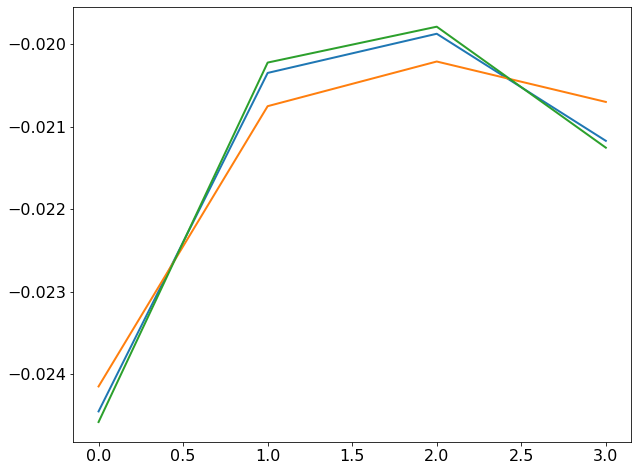

In [227]:
plt.plot( (pred_syst-pred) / pred )
plt.plot( (pred_syst1-pred1) / pred1 )
plt.plot( (pred_syst2-pred2) / pred2 )

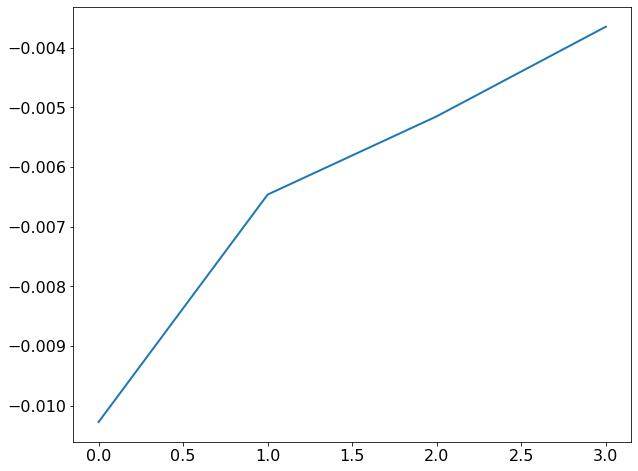

In [231]:
plt.plot((ttbar-ttbar_syst)/ttbar)
#plt.plot(ttbar_syst)

In [218]:
(np.sum(pred) - np.sum(pred_syst)) / np.sum(pred)

0.02077110803870846